<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 131.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 138.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 123.9 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [9]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




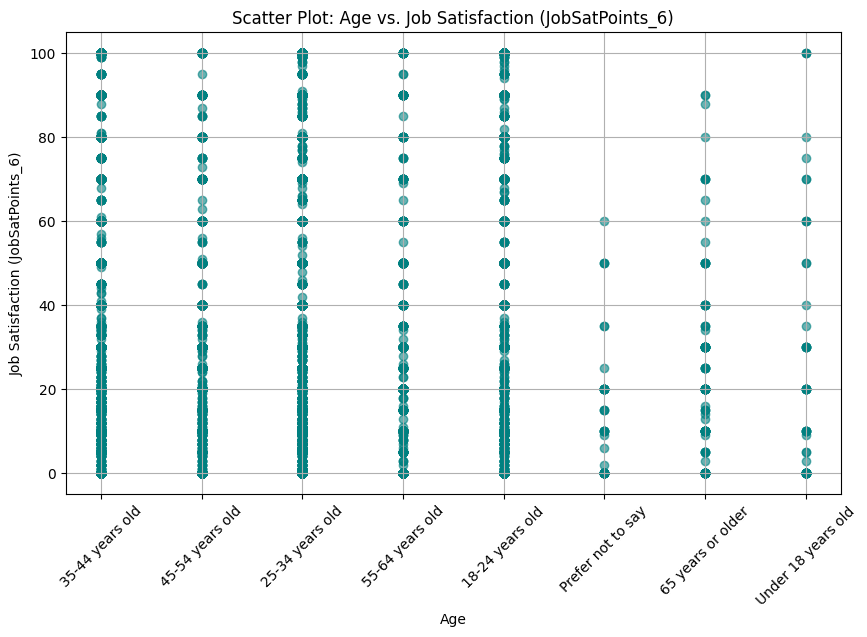

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query Age and JobSatPoints_6 columns
QUERY = """
SELECT Age, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Optional – convert JobSatPoints_6 to numeric (if not already)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna(subset=['JobSatPoints_6'])

# Step 5: Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['JobSatPoints_6'], alpha=0.6, color='teal')
plt.title('Scatter Plot: Age vs. Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


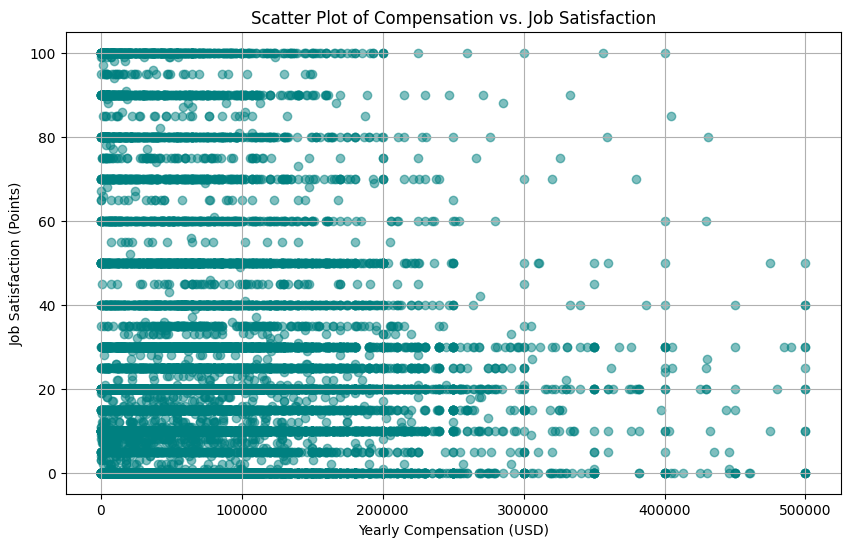

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query Compensation and Job Satisfaction
QUERY = """
SELECT ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE ConvertedCompYearly IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Optional – Remove outliers in compensation
df = df[df['ConvertedCompYearly'] <= 500000]  # Adjust upper limit if needed

# Step 5: Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], alpha=0.5, color='teal')
plt.title("Scatter Plot of Compensation vs. Job Satisfaction")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (Points)")
plt.grid(True)
plt.show()


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


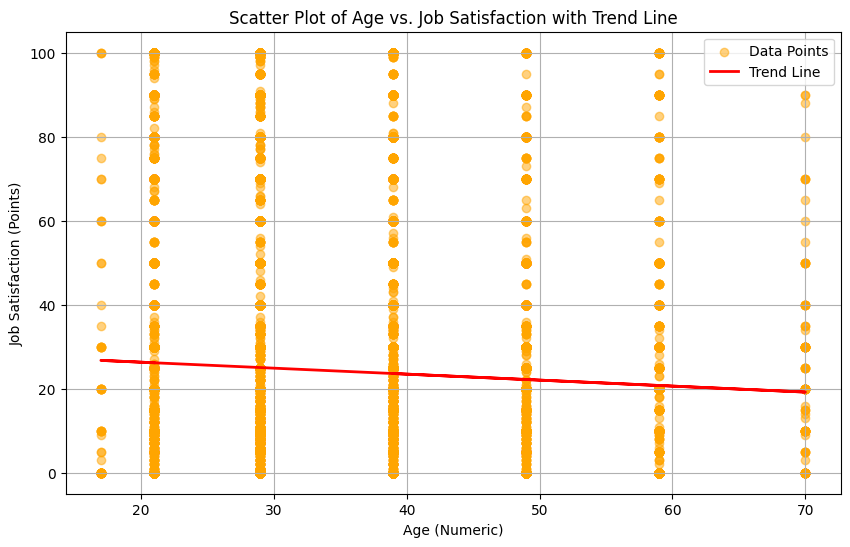

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query Age and Job Satisfaction
QUERY = """
SELECT Age, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Convert Age to numeric categories
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}
df['AgeNumeric'] = df['Age'].map(age_mapping)
df = df.dropna(subset=['AgeNumeric'])

# Step 5: Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['AgeNumeric'], df['JobSatPoints_6'], alpha=0.5, color='orange', label='Data Points')

# Step 6: Add regression (trend) line
z = np.polyfit(df['AgeNumeric'], df['JobSatPoints_6'], 1)
p = np.poly1d(z)
plt.plot(df['AgeNumeric'], p(df['AgeNumeric']), color='red', linewidth=2, label='Trend Line')

# Step 7: Customize plot
plt.title("Scatter Plot of Age vs. Job Satisfaction with Trend Line")
plt.xlabel("Age (Numeric)")
plt.ylabel("Job Satisfaction (Points)")
plt.grid(True)
plt.legend()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


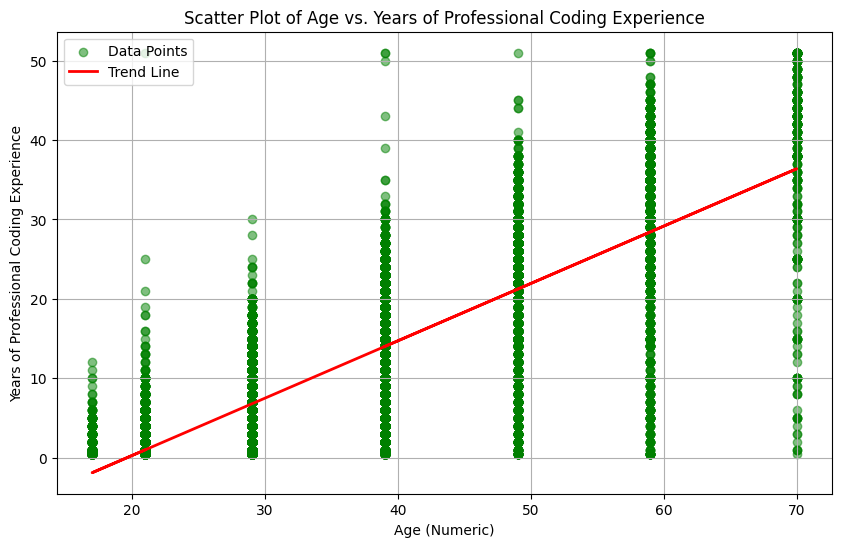

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query Age and YearsCodePro
QUERY = """
SELECT Age, YearsCodePro
FROM main
WHERE Age IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close connection
conn.close()

# Convert Age to numeric
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Convert YearsCodePro to numeric
def convert_years(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    else:
        try:
            return float(val)
        except:
            return np.nan

df['YearsCodeProNumeric'] = df['YearsCodePro'].apply(convert_years)

# Drop rows with missing values
df = df.dropna(subset=['AgeNumeric', 'YearsCodeProNumeric'])

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['AgeNumeric'], df['YearsCodeProNumeric'], alpha=0.5, color='green', label='Data Points')

# Regression line
z = np.polyfit(df['AgeNumeric'], df['YearsCodeProNumeric'], 1)
p = np.poly1d(z)
plt.plot(df['AgeNumeric'], p(df['AgeNumeric']), color='red', linewidth=2, label='Trend Line')

# Plot customization
plt.title("Scatter Plot of Age vs. Years of Professional Coding Experience")
plt.xlabel("Age (Numeric)")
plt.ylabel("Years of Professional Coding Experience")
plt.grid(True)
plt.legend()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


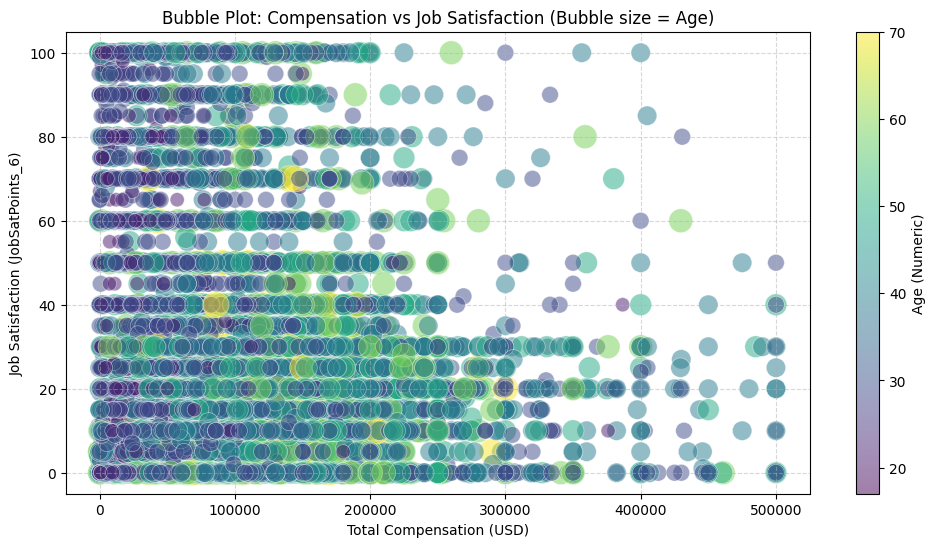

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query relevant columns
QUERY = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Map Age to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Remove rows with NaN after mapping
df = df.dropna(subset=['AgeNumeric', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Optional: Remove unrealistic compensation values
df = df[df['ConvertedCompYearly'] <= 500000]

# Bubble plot
plt.figure(figsize=(12,6))
plt.scatter(
    df['ConvertedCompYearly'], 
    df['JobSatPoints_6'], 
    s=df['AgeNumeric']*5,  # Bubble size proportional to age
    alpha=0.5, 
    c=df['AgeNumeric'],     # Color represents age
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.colorbar(label='Age (Numeric)')
plt.title("Bubble Plot: Compensation vs Job Satisfaction (Bubble size = Age)")
plt.xlabel("Total Compensation (USD)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query relevant columns
QUERY = """
SELECT LanguageHaveWorkedWith, JobSatPoints_6
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Split multiple languages into separate rows
df = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Optional: Remove leading/trailing whitespace
df['Language'] = df['Language'].str.strip()

# Take top 10 most common languages for clarity
top_languages = df['Language'].value_counts().nlargest(10).index
df_top = df[df['Language'].isin(top_languages)]

# Plot
plt.figure(figsize=(12,6))
plt.scatter(
    df_top['Language'], 
    df_top['JobSatPoints_6'], 
    alpha=0.5, 
    color='skyblue', 
    edgecolors='k'
)
plt.title("Scatter Plot: Programming Languages vs Job Satisfaction")
plt.xlabel("Programming Language")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [ ]:
## Write your code here

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
## Write your code here

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
